In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
weather = pd.read_csv('weather_features.csv')
print(weather.shape)
weather['dateTime'] = pd.to_datetime(weather['dt_iso'],utc=True)
weather = weather.set_index(pd.DatetimeIndex(weather['dateTime']))
weather = weather.drop(['dt_iso'],axis=1)
weather['temp'] = weather['temp']-273.15
weather["month"] = weather["dateTime"].dt.month
weather["season"] = weather["dateTime"].dt.quarter
weather["year"] = weather["dateTime"].dt.year
print(weather.shape)

(178396, 17)
(178396, 20)


In [3]:
energy = pd.read_csv('energy_dataset.csv')
print(energy.shape)
energy['dateTime'] = pd.to_datetime(energy['time'],utc=True)
energy = energy.set_index(pd.DatetimeIndex(energy['dateTime']))
energy = energy.drop(['time'],axis=1)
energy["month"] = energy["dateTime"].dt.month
energy["season"] = energy["dateTime"].dt.quarter
energy["year"] = energy["dateTime"].dt.year
print(energy.shape)

(35064, 29)
(35064, 32)


In [4]:
x = weather[['temp','month','season','year']].resample('D').mean()
y = energy[['price actual','month','season','year']].resample('D').mean()

print(x)

                               temp  month  season    year
dateTime                                                  
2014-12-31 00:00:00+00:00 -0.658537   12.0     4.0  2014.0
2015-01-01 00:00:00+00:00  3.851207    1.0     1.0  2015.0
2015-01-02 00:00:00+00:00  4.801217    1.0     1.0  2015.0
2015-01-03 00:00:00+00:00  5.679727    1.0     1.0  2015.0
2015-01-04 00:00:00+00:00  6.493354    1.0     1.0  2015.0
...                             ...    ...     ...     ...
2018-12-27 00:00:00+00:00  7.521707   12.0     4.0  2018.0
2018-12-28 00:00:00+00:00  8.003821   12.0     4.0  2018.0
2018-12-29 00:00:00+00:00  7.955917   12.0     4.0  2018.0
2018-12-30 00:00:00+00:00  6.986774   12.0     4.0  2018.0
2018-12-31 00:00:00+00:00  7.413362   12.0     4.0  2018.0

[1462 rows x 4 columns]


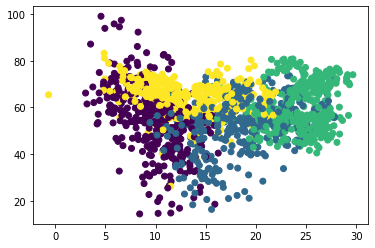

In [5]:
plt.scatter(x['temp'],y['price actual'],c=x['season'])
plt.show()

Text(0.5, 1.0, 'Fall')

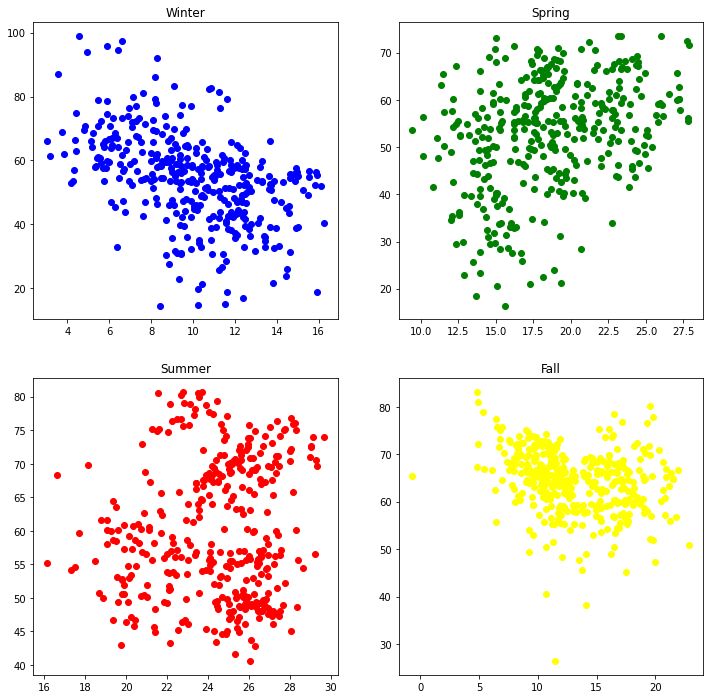

In [6]:
fig, axs = plt.subplots(2, 2,figsize=(12, 12))
axs[0, 0].scatter(x[x['season']==1]['temp'], y[y['season']==1]['price actual'],c='blue')
axs[0, 0].set_title('Winter')
axs[0, 1].scatter(x[x['season']==2]['temp'], y[y['season']==2]['price actual'],c='green')
axs[0, 1].set_title('Spring')
axs[1, 0].scatter(x[x['season']==3]['temp'], y[y['season']==3]['price actual'],c='red')
axs[1, 0].set_title('Summer')
axs[1, 1].scatter(x[x['season']==4]['temp'], y[y['season']==4]['price actual'],c='yellow')
axs[1, 1].set_title('Fall')




In [7]:
X_train = x[x['year']!=2018]['temp'].values.reshape(-1,1)
X_test= x[x['year']==2018]['temp'].values.reshape(-1,1)
y_train = y[y['year']!=2018]['price actual'].values.reshape(-1,1)
y_test= y[y['year']==2018]['price actual'].values.reshape(-1,1)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)

Mean squared error
166.90396304815857


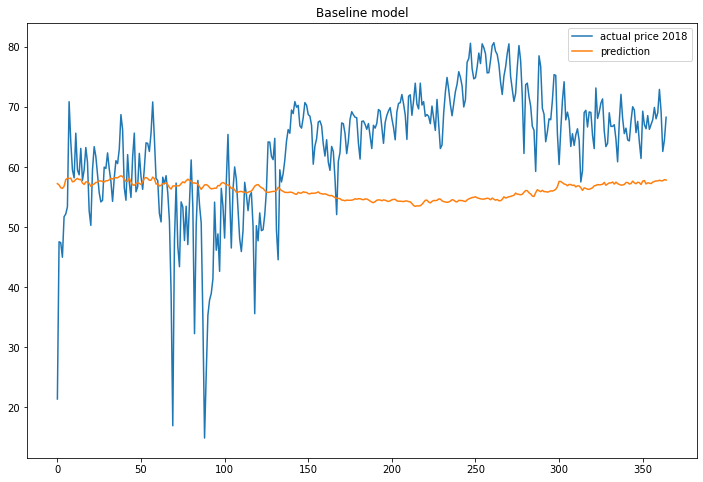

In [9]:
y_pred_base = reg.predict(X_test)
print("Mean squared error" )
print(mean_squared_error(y_test, y_pred_base))

plt.figure(figsize=(12,8))

plt.plot(y_test,label='actual price 2018')
plt.plot(y_pred_base,label='prediction')
plt.title('Baseline model')
plt.legend()
plt.show()

In [10]:
y_pred_season = []
for i in range(4):
   
    
    X_train1 = x[(x['year'] != 2018) & (x['season'] == i+1)]['temp'].values.reshape(-1,1)
    X_test1= x[(x['year']==2018) & (x['season'] == i+1)]['temp'].values.reshape(-1,1)
    y_train1 = y[(y['year']!=2018 ) & (x['season'] == i+1)]['price actual'].values.reshape(-1,1)
    y_test1= y[(y['year']==2018) & (x['season'] == i+1)]['price actual'].values.reshape(-1,1)
    reg1 = LinearRegression().fit(X_train1, y_train1)
    pred = reg1.predict(X_test1)  
    y_pred_season.append(pred)


Mean squared error
132.83338667333425


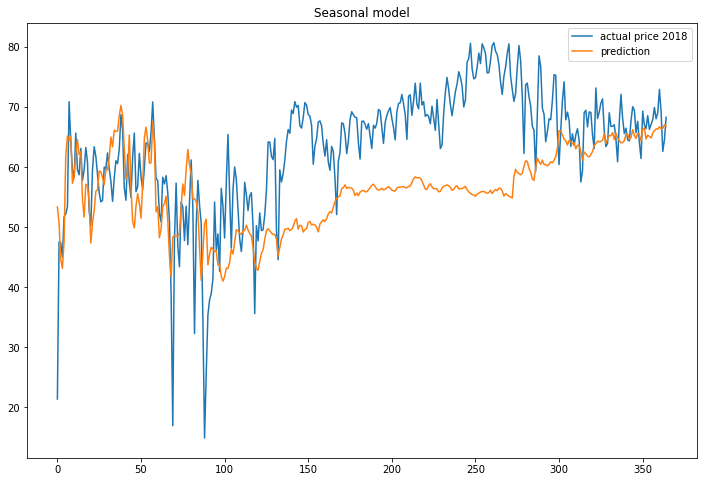

In [11]:
predy =np.array([item for sublist in y_pred_season for item in sublist])
print("Mean squared error" )
print(mean_squared_error(y_test, predy))
plt.figure(figsize=(12,8))

plt.plot(y_test,label='actual price 2018')
plt.plot(predy, label='prediction')
plt.title('Seasonal model')
plt.legend()
plt.show()

In [12]:
y_pred_monthly = []
for i in range(12):
   
    
    X_train2 = x[(x['year'] != 2018) & (x['month'] == i+1)]['temp'].values.reshape(-1,1)
    X_test2= x[(x['year']==2018) & (x['month'] == i+1)]['temp'].values.reshape(-1,1)
    y_train2 = y[(y['year']!=2018 ) & (x['month'] == i+1)]['price actual'].values.reshape(-1,1)
    y_test2= y[(y['year']==2018) & (x['month'] == i+1)]['price actual'].values.reshape(-1,1)
    reg2 = LinearRegression().fit(X_train2, y_train2)
    pred = reg1.predict(X_test2)  
    y_pred_monthly.append(pred)


Mean squared error
161.0703165297387


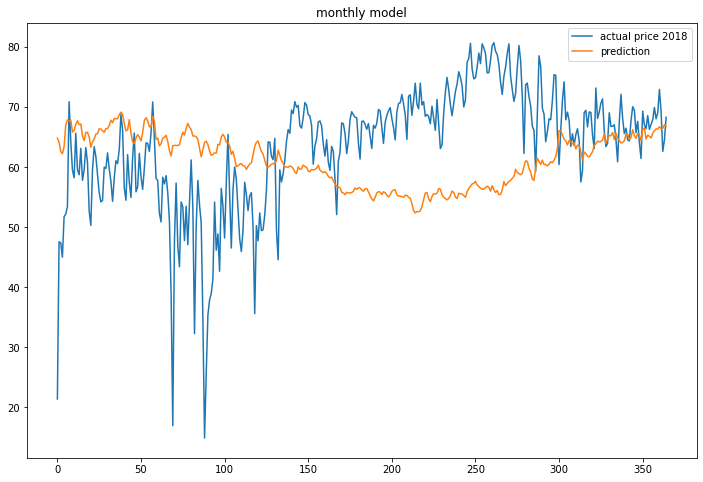

In [14]:
pred_monthly = np.array([item for sublist in y_pred_monthly for item in sublist])
print("Mean squared error" )
print(mean_squared_error(y_test, pred_monthly))
plt.figure(figsize=(12,8))
plt.plot(y_test,label='actual price 2018')
plt.plot(pred_monthly,label='prediction')
plt.legend()
plt.title('monthly model')
plt.show()

In [147]:
from sklearn.preprocessing import MinMaxScaler

time_steps = 10
X_train = x[x['year']!=2018]['temp'].values
X_test= x[x['year']==2018]['temp'].values
Y_train = y[y['year']!=2018]['price actual'].values
Y_test= y[y['year']==2018]['price actual'].values
train_data = np.vstack((X_train,Y_train)).T
test_data = np.vstack((X_test,Y_test)).T

scaler = MinMaxScaler(feature_range=(0, 1))
print(train_data.shape)
print(test_data.shape)
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)
print(train_data.shape)
print(test_data.shape)

def make_XY(data,timesteps):
    X = []
    Y = data[:,-1][timesteps:]
    for i in range(len(Y)):
        X.append(data[i:i+timesteps,:])
    
    X = np.asarray(X)
    return X, Y    
 
time_steps = 5    
    
trainX , trainY = make_XY(train_data,time_steps)
testX, testY = make_XY(test_data, time_steps)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1097, 2)
(365, 2)
(1097, 2)
(365, 2)
(1092, 5, 2)
(1092,)
(360, 5, 2)
(360,)


In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, BatchNormalization


model = Sequential()

model.add(SimpleRNN(3,input_shape=trainX.shape[1:],activation='tanh' , return_sequences=False))

model.add(Dense(5,activation="tanh"))

model.add(Dense(1, activation='tanh'))



#opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2, validation_data=(testX, testY))

Epoch 1/30
1092/1092 - 1s - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 2/30
1092/1092 - 1s - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 3/30
1092/1092 - 1s - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 4/30
1092/1092 - 1s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 5/30
1092/1092 - 1s - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 6/30
1092/1092 - 1s - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 7/30
1092/1092 - 1s - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 8/30
1092/1092 - 1s - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 9/30
1092/1092 - 1s - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 10/30
1092/1092 - 1s - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 11/30
1092/1092 - 1s - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0155 - va

In [150]:
p = model.predict(testX)
print(testX.shape)
print(p.shape)
print(testY.shape)



(360, 5, 2)
(360, 1)
(360,)


Mean squared error
0.01074763025138968


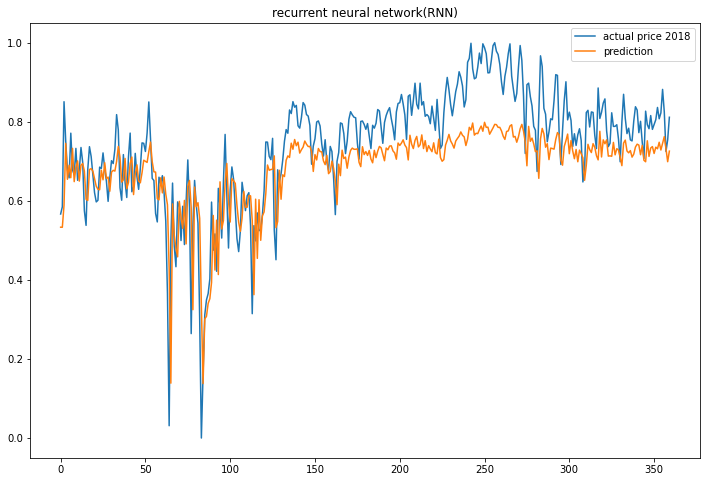

In [151]:
print("Mean squared error" )
print(mean_squared_error(testY, p))
plt.figure(figsize=(12,8))
plt.plot(testY,label='actual price 2018')
plt.plot(p,label='prediction')
plt.legend()
plt.title('recurrent neural network(RNN)')
plt.show()